In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcol
import pygmt
import numpy as np
import datetime as dt

/home/ords/crd/ccrn/reo000/mamba_files/envs/mpy_geopd/lib/python3.12/site-packages/pyproj/network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)


In [2]:
def day_of_year(dts): 
    if isinstance(dts,pd.Timestamp):
        return (dts-pd.Timestamp(dt.datetime(dts.year-1,12,31))).days
    elif hasattr(dts,'__len__') and not isinstance(dts,str): # assume array of datetimes
        return np.array([day_of_year(el) for el in dts])
    elif pd.isnull(dts):
        return np.nan
    else:
        raise TypeError('bad type: ', type(dts))

In [3]:
gridSpecs=pd.read_csv('gridspecs.csv')
npoints=len(gridSpecs)
gridSpecs.columns

Index(['Unnamed: 0', 'nom_lon', 'nom_lat', 'lonedges_lo', 'lonedges_hi',
       'latedges_lo', 'latedges_hi', 'Sta', 'StaLon', 'StaLat', 'Index'],
      dtype='object')

In [4]:
x=gridSpecs.Index
len(x)

38

In [5]:
z_edges=np.arange(0,4001,5) # 0 to 4000 inclusive
z_center=(z_edges[:-1]+z_edges[1:])/2
len(z_center)

800

In [6]:
f=xr.open_dataset('/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/StatDownOc/data/NEP10k-ROMS/nep_revised_hind_moave_all_subset.nc')
f

<xarray.Dataset> Size: 4GB
Dimensions:     (s_rho: 42, ocean_time: 312, eta_rho: 151, xi_rho: 226, rk: 42)
Coordinates:
  * ocean_time  (ocean_time) datetime64[ns] 2kB 1995-01-16 ... 2020-12-16
  * s_rho       (s_rho) float64 336B -0.9881 -0.9643 ... -0.03571 -0.0119
  * eta_rho     (eta_rho) float64 1kB 151.0 152.0 153.0 ... 299.0 300.0 301.0
    lat_rho     (eta_rho, xi_rho) float64 273kB ...
    lon_rho     (eta_rho, xi_rho) float64 273kB ...
  * rk          (rk) float64 336B 1.0 2.0 3.0 4.0 5.0 ... 39.0 40.0 41.0 42.0
  * xi_rho      (xi_rho) float64 2kB 1.0 2.0 3.0 4.0 ... 223.0 224.0 225.0 226.0
Data variables:
    Cs_r        (s_rho) float64 336B ...
    hc          float64 8B ...
    salt        (ocean_time, s_rho, eta_rho, xi_rho) float32 2GB ...
    temp        (ocean_time, s_rho, eta_rho, xi_rho) float32 2GB ...
    zeta        (ocean_time, eta_rho, xi_rho) float32 43MB ...
    h_rho       (eta_rho, xi_rho) float64 273kB ...
    zval_rho    (rk, eta_rho, xi_rho) float64 11MB ...
Attributes: (12/48)
    file:                       /gscratch/goaclim/hermann/NEP_OUTPUT/hind/hin...
    format:                     netCDF-3 classic file
    Conventions:                CF-1.6
    type:                       ROMS/TOMS averages file
    title:                      Northeast Pacific 10km Grid
    var_info:                   /gscratch/goaclim/hermann/Ken_CGOA/CGOA_Model...
    ...                         ...
    CPP_options:                NEP, ADD_FSOBC, ADD_M2OBC, ANA_BPFLUX, ANA_BS...
    NCO:                        netCDF Operators version 4.7.5 (Homepage = ht...
    nco_openmp_thread_number:   1
    nco_input_file_number:      1131
    nco_input_file_list:        /ahr2/hermann/nep_klone/hind/hind00-withbio_a...
    history_of_appended_files:  Wed Nov 19 10:45:32 2025: Appended file zpoin...

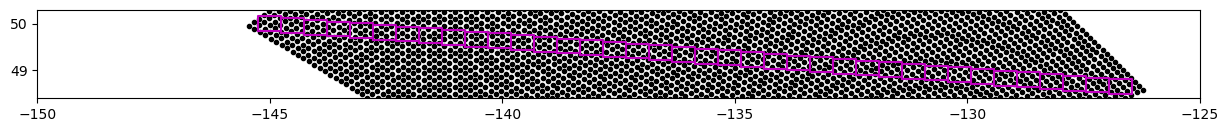

In [42]:
fig,ax=plt.subplots(1,1,figsize=(15,5))
ax.plot(f.lon_rho[45:135,128:212]-360,f.lat_rho[45:135,128:212],'k.');
for ii in range(0,npoints):
    ax.plot([gridSpecs.lonedges_lo[ii],gridSpecs.lonedges_lo[ii],gridSpecs.lonedges_hi[ii],gridSpecs.lonedges_hi[ii],gridSpecs.lonedges_lo[ii]],
            [gridSpecs.latedges_lo[ii],gridSpecs.latedges_hi[ii],gridSpecs.latedges_hi[ii],gridSpecs.latedges_lo[ii],gridSpecs.latedges_lo[ii]],'m-')
ax.set_xlim(-150,-125)
ax.set_ylim(48.4,50.3)
ax.set_aspect(1)

In [9]:
### try re-calculating zval_rho and see if it conforms
# https://www.myroms.org/wiki/Vertical_S-coordinate
# https://www.mathworks.com/matlabcentral/answers/2056554-from-s-coordinate-at-rho-points-to-depth
# just use static grid

In [10]:
f.s_rho

<xarray.DataArray 's_rho' (s_rho: 42)> Size: 336B
array([-0.988095, -0.964286, -0.940476, -0.916667, -0.892857, -0.869048,
       -0.845238, -0.821429, -0.797619, -0.77381 , -0.75    , -0.72619 ,
       -0.702381, -0.678571, -0.654762, -0.630952, -0.607143, -0.583333,
       -0.559524, -0.535714, -0.511905, -0.488095, -0.464286, -0.440476,
       -0.416667, -0.392857, -0.369048, -0.345238, -0.321429, -0.297619,
       -0.27381 , -0.25    , -0.22619 , -0.202381, -0.178571, -0.154762,
       -0.130952, -0.107143, -0.083333, -0.059524, -0.035714, -0.011905])
Coordinates:
  * s_rho    (s_rho) float64 336B -0.9881 -0.9643 -0.9405 ... -0.03571 -0.0119
Attributes:
    long_name:      S-coordinate at RHO-points
    valid_min:      -1.0
    valid_max:      0.0
    positive:       up
    standard_name:  ocean_s_coordinate_g1
    formula_terms:  s: s_rho C: Cs_r eta: zeta depth: h depth_c: hc
    field:          s_rho, scalar

In [11]:
f.zval_rho[:,30,50].values # deep to shallow, like all other vars

array([5.30867028e+03, 4.95552720e+03, 4.64031186e+03, 4.35833480e+03,
       4.10532748e+03, 3.87737301e+03, 3.67084208e+03, 3.48233473e+03,
       3.30862933e+03, 3.14664162e+03, 2.99339823e+03, 2.84603097e+03,
       2.70179981e+03, 2.55815274e+03, 2.41282866e+03, 2.26400293e+03,
       2.11046387e+03, 1.95179177e+03, 1.78849612e+03, 1.62205787e+03,
       1.45483311e+03, 1.28980508e+03, 1.13021707e+03, 9.79160663e+02,
       8.39210212e+02, 7.12177926e+02, 5.99022219e+02, 4.99896395e+02,
       4.14293952e+02, 3.41237668e+02, 2.79468044e+02, 2.27603129e+02,
       1.84257986e+02, 1.48123785e+02, 1.18012892e+02, 9.28785205e+01,
       7.18171589e+01, 5.40604891e+01, 3.89617180e+01, 2.59796464e+01,
       1.46625409e+01, 4.63297384e+00])

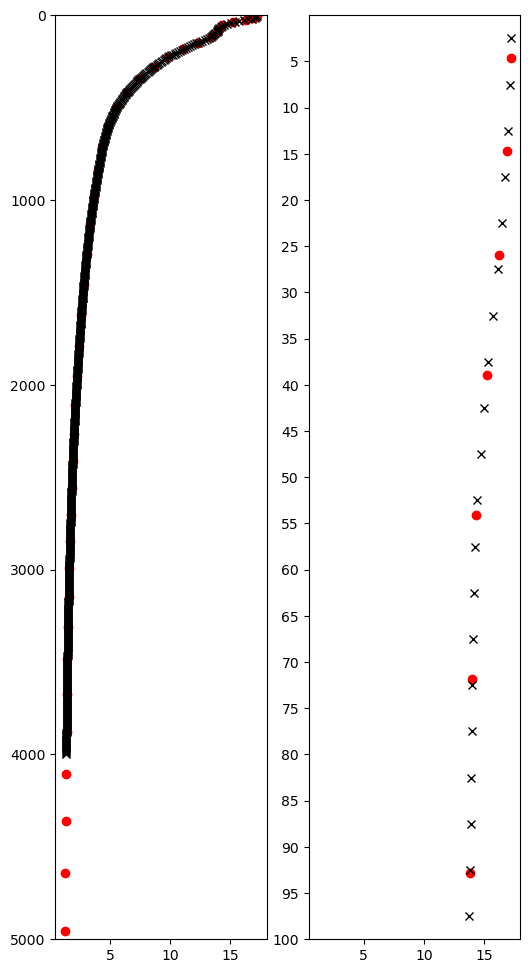

In [12]:
t5m=np.interp(z_center,np.flipud(f.zval_rho[:,30,50]),np.flipud(f.temp[5,:,30,50]))
fig,ax=plt.subplots(1,2,figsize=(6,12))
ax[0].plot(f.temp[5,:,30,50],f.zval_rho[:,30,50],'ro')
ax[0].plot(t5m,z_center,'kx')
ax[0].set_ylim(5000,0)
ax[1].plot(f.temp[5,:,30,50],f.zval_rho[:,30,50],'ro')
ax[1].plot(t5m,z_center,'kx')
ax[1].set_ylim(100,0)
ax[1].set_yticks(np.arange(100,0,-5));

In [46]:
# get indices for grid points within each target grid cell (brute force)

In [65]:
gridlist={ii:[] for ii in range(0,len(gridSpecs))}

In [56]:
f.lat_rho[eta,xi]

<xarray.DataArray 'lat_rho' ()> Size: 8B
array(48.410436)
Coordinates:
    eta_rho  float64 8B 196.0
    lat_rho  float64 8B 48.41
    lon_rho  float64 8B 233.4
    xi_rho   float64 8B 209.0
Attributes:
    long_name:  latitude of RHO-points
    units:      degree_north
    history:    From roms_grd_nep

In [66]:
for eta in range(45,135):
    for xi in range(128,212):
        la=f.lat_rho[eta,xi].values
        lo=f.lon_rho[eta,xi].values-360
        if f.lat_rho[eta,xi]>48.4 and f.lat_rho[eta,xi]<50.3: # eliminate some points right away, check the rest
            search=gridSpecs.loc[(gridSpecs['lonedges_lo']<lo)&(gridSpecs['lonedges_hi']>=lo)&(gridSpecs['latedges_lo']<la)&\
                                (gridSpecs['latedges_hi']>=la)].index.values
            if len(search)==0: 
                pass
            else:
                gridlist[search[0]].append((eta,xi))
        

In [67]:
gridlist

{0: [(131, 130),
  (131, 131),
  (132, 129),
  (132, 130),
  (132, 131),
  (132, 132),
  (133, 129),
  (133, 130),
  (133, 131),
  (134, 130)],
 1: [(128, 132),
  (129, 131),
  (129, 132),
  (129, 133),
  (130, 131),
  (130, 132),
  (130, 133),
  (131, 132)],
 2: [(126, 133),
  (126, 134),
  (127, 132),
  (127, 133),
  (127, 134),
  (127, 135),
  (128, 133),
  (128, 134),
  (128, 135),
  (129, 134)],
 3: [(123, 136),
  (124, 135),
  (124, 136),
  (124, 137),
  (125, 134),
  (125, 135),
  (125, 136),
  (125, 137),
  (126, 135),
  (126, 136)],
 4: [(121, 137),
  (121, 138),
  (122, 136),
  (122, 137),
  (122, 138),
  (122, 139),
  (123, 137),
  (123, 138)],
 5: [(118, 139),
  (119, 138),
  (119, 139),
  (119, 140),
  (120, 138),
  (120, 139),
  (120, 140),
  (120, 141),
  (121, 139),
  (121, 140)],
 6: [(116, 141),
  (116, 142),
  (117, 140),
  (117, 141),
  (117, 142),
  (117, 143),
  (118, 140),
  (118, 141),
  (118, 142),
  (119, 141)],
 7: [(113, 143),
  (114, 142),
  (114, 143),
  (